In [189]:
# import required packages
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.utilities as u
import tempfile
import os
from IPython.display import Image, display

In [190]:
# set paths and all required arguments¶
trajectory_file = "data/input.xtc" 
topology_file = "data/input.gro" 
atom_selection_global = "name CA"
atom_selection_local = "resid 120:160"
strata_number = 200
size = 10
dissimilarity_measure = d.Bhattacharyya

# set a temporary directory to save all output files
temp_dir = tempfile.mkdtemp()

In [191]:
# create a protein data object
p_data_global = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [192]:
# create a protein property object for global RMSD
p_property_global = gp.RMSD(p_data_global, atom_selection_global, fit=True)

In [193]:
# calculate reference property for full trajectory for global RMSD
p_property_global.calculate_property()

In [194]:
# create uniform sampler object 
sampler_uniform = s.UniformSampler(
            protein_property=p_property_global,
            protein_data=p_data_global,
            output_folder=temp_dir,
            file_prefix='stage1',
            strata_number = strata_number,
            dissimilarity_measure=dissimilarity_measure,
        )     

In [195]:
# generate sampled property for specific sample size for global RMSD
sampled_property_global = sampler_uniform.sample(round(int(size) * p_data_global.n_frames / 100))

In [196]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='stage1',
    p_prop=p_property_global,
    s_prop=sampled_property_global,
    p_data=p_data_global,
    p=size,
    machine_learning=None,
)

In [197]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['stage1_10_RMSD.npy', 'stage1_10_RMSD.xtc', 'stage1_10_RMSD.dat']


In [198]:
# Access generated new xtc file
xtc_file = ""
for fname in (os.listdir(temp_dir)):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.xtc':
        xtc_file = fpath

In [199]:
# create a protein data object from generated sample with global selection
p_data_local = prot.ProteinData(xtc_file,topology_file,config_parameters=None)

In [200]:
# create a protein property object for local RMSD
p_property_local = gp.RMSD(p_data_local, atom_selection_local, fit=True)

In [201]:
# calculate reference property for full trajectory for global RMSD
p_property_local.calculate_property()

In [202]:
# create uniform sampler object 
sampler_weighted = s.WeightedSampler(
            protein_property=p_property_local,
            protein_data=p_data_local,
            output_folder=temp_dir,
            file_prefix='stage2',
            weights_vector=None,
            seed_number=1999,
            dissimilarity_measure=dissimilarity_measure
)

Weights not provided. They will be estimated from discretized property vector.


In [203]:
# generate sampled property for specific sample size for global RMSD
sampled_property_local = sampler_weighted.sample(round(int(size) * p_data_local.n_frames / 100))

In [204]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='stage2',
    p_prop=p_property_local,
    s_prop=sampled_property_local,
    p_data=p_data_local,
    p=size,
    machine_learning=None,
)

In [205]:
# generate plot for global and local and save files in temporary directory
u.plot_property(output_folder=temp_dir,
            file_prefix='stage1',
            p_prop=p_property_global,
            s_prop=sampled_property_global,
            p=size,)

u.plot_property(output_folder=temp_dir,
            file_prefix='stage2',
            p_prop=p_property_local,
            s_prop=sampled_property_local,
            p=size,)

<Figure size 640x480 with 0 Axes>

In [206]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['stage1_10_RMSD.npy', 'stage2_10_RMSD.xtc', 'stage1_10_RMSD.xtc', 'stage2_10_RMSD_plot.png', 'stage2_10_RMSD.npy', '.stage1_10_RMSD.xtc_offsets.npz', 'stage1_10_RMSD_plot.png', 'stage1_10_RMSD.dat', 'stage2_10_RMSD.dat']


stage2_10_RMSD_plot.png


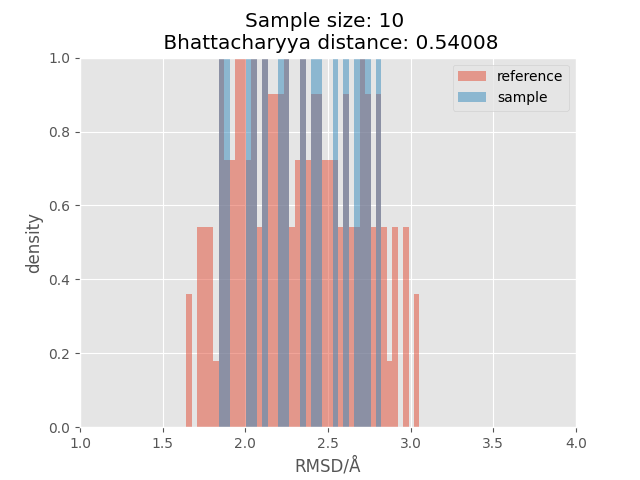

stage1_10_RMSD_plot.png


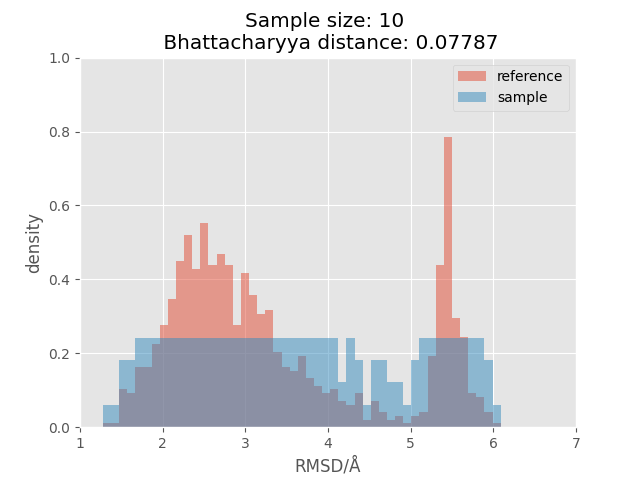

In [207]:
# display all distribution plots for all sample sizes 
for fname in (os.listdir(temp_dir)):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        print(fname)
        display(Image(filename=fpath))

In [209]:
# display tables with calculated local property for all different sample sizes
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.dat':
            with open(fpath, 'r') as file:
                contents = file.read()
                print(fname)
                print('-----------------------')
                print(contents)  
                print('-----------------------')

stage1_10_RMSD.dat
-----------------------
21 1.277772339388071
18 1.396260034314145
74 1.4872574866401562
81 1.5271363543029166
24 1.551800945194343
14 1.593266864584502
15 1.6186476407948693
101 1.6485928239345315
174 1.6779970592814386
351 1.7108303774716476
312 1.7309281633044635
37 1.752662697189771
12 1.783218675631353
452 1.813060627438866
20 1.819295034842841
80 1.8479267063049567
242 1.8889846821765481
517 1.8959751564917453
104 1.9272239238610935
614 1.9532127889602706
308 1.982473470410436
103 2.0054354383633117
277 2.020063202564934
17 2.0504720623184967
620 2.0699063329000693
178 2.0930735217486816
249 2.116538473997571
62 2.141123474619924
360 2.1798458627248634
247 2.2018290762178725
589 2.2264291999099455
739 2.2434599983980337
201 2.2605796743718716
753 2.2919949805595654
523 2.3256949140149437
243 2.335064528881346
757 2.381604737474138
418 2.395443319291142
369 2.40924188483519
198 2.4511637709961636
586 2.4794576883162387
361 2.489653483829824
619 2.51593978957206
4